In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn import set_config; set_config(display='diagram')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score,precision_score,recall_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [5]:
import csv

with open('iris.data.txt', 'r') as csvfile:

    lines = csv.reader(csvfile)

    for row in lines :

        print (', '.join(row))

5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

####  Data

In [28]:
import csv

import random

def loadDataset(filename, split, trainingSet=[] , testSet=[]):

    with open(filename, 'r') as csvfile:

        lines = csv.reader(csvfile)

        dataset = list(lines)

    for x in range(len(dataset)-1):

        for y in range(4):

            dataset[x][y] = float(dataset[x][y])

        if random.random() < split:

            trainingSet.append(dataset[x])

        else:

            testSet.append(dataset[x])



#### split data

In [29]:
#We can test this function out with our iris dataset, as follows:

trainingSet=[]

testSet=[]

loadDataset('iris.data.txt', 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))

print ('Test: ' + repr(len(testSet)) )

Train: 103
Test: 46


In [30]:
trainingSet

[[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
 [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
 [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
 [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
 [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
 [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
 [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
 [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
 [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
 [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
 [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
 [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
 [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
 [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
 [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
 [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
 [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
 [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'],
 [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'],
 [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'],
 [5.0, 3.4, 1.6, 0.4, 'Iris-setosa'],
 [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'],
 [5.2, 3.4, 1.4, 0.2, 'Iris-setosa'],
 [4.8, 3.1, 1.6, 0.2, 'Iris-setosa'],
 [5.4, 3.4, 1.5, 0.4, 'Iris-setosa'],
 [5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
 [5.5, 4.2, 

####  Similarity

In [45]:
import math
def euclideanDistance(instance1,instance2,length):
    distance = 0
    for x in range(length):
        distance += pow(float((instance1[x])-float(instance2[x])),2)
    return math.sqrt(distance)

In [46]:
data1 = [2, 2, 2, 'a']

data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)

print('Distance: ' + repr(distance))

Distance: 3.4641016151377544


#### Neighbors

In [47]:
import operator

def getNeighbors(trainingSet, testInstance, k):

    distances = []

    length = len(testInstance)-1

    for x in range(len(trainingSet)):

        dist = euclideanDistance(testInstance, trainingSet[x], length)

        distances.append((trainingSet[x], dist))

        distances.sort(key=operator.itemgetter(1))

    neighbors = []

    for x in range(k):

        neighbors.append(distances[x][0])

    return neighbors

In [48]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]

k = 1

neighbors = getNeighbors(trainSet, testInstance, 1)

print(neighbors)

[[4, 4, 4, 'b']]


#### Response

In [49]:
import operator

def getResponse(neighbors):

    classVotes = {}

    for x in range(len(neighbors)):

        response = neighbors[x][-1] #complete with appropriate number

        if response in classVotes:
            classVotes[response] += 1 
        else:
            classVotes[response] = 1

    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)

    return sortedVotes[0][0]

In [50]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)

print(response)

a


#### Accuracy

In [80]:
def getAccuracy(testSet,predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]: # [-1] The value is the last value, which is the last value of each row, which is the flower classification
            correct += 1
    return (correct/float(len(testSet))) * 100.00


In [81]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)

print(accuracy)

66.66666666666666


#### main

In [84]:
def main():
# prepare data
    trainingSet=[]
    testSet=[]
    split = 0.80
    loadDataset('iris.data.txt', split, trainingSet, testSet)
    print ('Train set: ' + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))
# generate predictions
    predictions=[]
    k = 3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
        
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

main()

Train set: 115
Test set: 34
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-ve

#### another distance metric

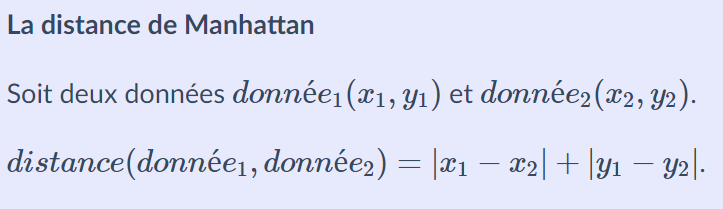

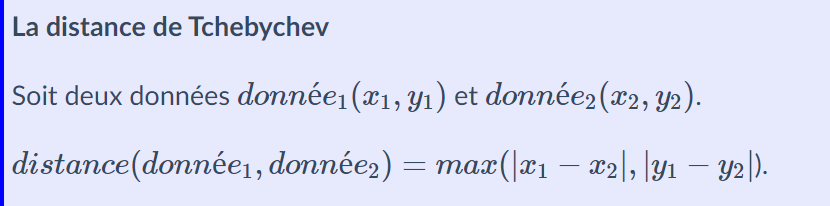